<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/2024_06_25_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

K-means clustering is an example of a model that is not trained. So, there is no training set, which is
called an unsupervised model, meaning without labels. K-means clustering is a type of classification
problem. The goal is to put data into groups by something they have in common, meaning put them in
clusters. Example use cases are:

• Recommending videos on TikTok or YouTube
• High credit risk borrowers
• popular social media influencers
• finding spambots




![](https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/images/kmeans-clustering.png)



$$\huge \sqrt{(a - b)^2}$$



![](https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/images/distance-between-points.png)


$$\huge a = (x1,y1)$$
$$\huge b = (x2, y2)$$

Pythagorean theorem

$$\huge a^2 + b^2 = c^2$$


$$\huge height = y2 - y1$$

$$\huge base = x2 -  x1 $$

length of distance ab:

$$\huge \sqrt{(y2 - y1)^2 + (x2 - x1)^2}$$

In [57]:
# use kmeans clustering algorithm

# from scikit-learn



import numpy as np
import matplotlib.pyplot as plt

# use KMeans

from sklearn.cluster import KMeans

# make up some data

from sklearn.datasets import make_blobs

# I want 100 data points grouped into 3 groups.  the center means the center of the group

# notice here that this will creat x-y coordinates in the object called X

# but I also have y.  before when did predictive models y was feature or the item to predict, like grades of diabetes

# we add y when we want to calculate accuracy.  it's not necessary.  the idea is to put put the data
# in X into 3 groups


# this just made up data.

#X , y = make_blobs(n_samples=100, centers=3, random_state=0)


# here we don't use y.  for your homework don't use y.  it's confusing.

X  = make_blobs(n_samples=100, centers=3, random_state=0)

# on purpose.  this made up data has incorrect cluster values.  or incorrect y values

# without that we have nothing to compare it to.  so we would have to find other ways to check
# the accuracy


In [58]:
X

(array([[ 2.63185834,  0.6893649 ],
        [ 0.08080352,  4.69068983],
        [ 3.00251949,  0.74265357],
        [-0.63762777,  4.09104705],
        [-0.07228289,  2.88376939],
        [ 0.62835793,  4.4601363 ],
        [-2.67437267,  2.48006222],
        [-0.57748321,  3.0054335 ],
        [ 2.72756228,  1.3051255 ],
        [ 0.34194798,  3.94104616],
        [ 1.70536064,  4.43277024],
        [ 2.20656076,  5.50616718],
        [ 2.52092996, -0.63858003],
        [ 2.50904929,  5.7731461 ],
        [-2.27165884,  2.09144372],
        [ 3.92282648,  1.80370832],
        [-1.62535654,  2.25440397],
        [ 0.1631238 ,  2.57750473],
        [-1.59514562,  4.63122498],
        [-2.63128735,  2.97004734],
        [-2.17052242,  0.69447911],
        [-1.56618683,  1.74978876],
        [-0.88677249,  1.30092622],
        [ 0.08848433,  2.32299086],
        [ 0.9845149 ,  1.95211539],
        [ 2.18217961,  1.29965302],
        [ 1.28535145,  1.43691285],
        [ 0.89011768,  1.798

This data is unlabeled.

when we did diabetes we had:


X (features, glucose, BMI)

y (1 or 0, diabetic prone or not)

classification is not a predictive model.

instead if just puts similar things together.  we call these **clusters**


use:

so if you are a banl and you want to make $$$.  you try to identify who is rich, who does not pay their loans,


then you do advertising promotion to the safest richest people




**Do we need Y?**

The y values generated by make_blobs represent the true labels of the clusters and are typically used for evaluating the performance of clustering algorithms. However, the KMeans algorithm itself does not require the y values to calculate the clusters. KMeans is an unsupervised learning algorithm, meaning it only needs the input data X to find the clusters.

The y values are useful if you want to assess the quality of the clustering using metrics such as the Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI). These metrics compare the clusters found by the algorithm to the true clusters.

**Gap Statistic**

The Gap Statistic compares the total within-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data. The optimal number of clusters is the one that maximizes the gap statistic.

In [12]:
 X.shape

(100, 2)

In [13]:
y

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

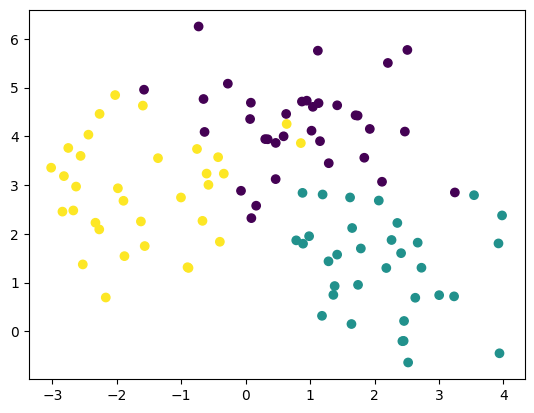

In [14]:
# the color represent groups

plt.scatter(X[:,0], X[:,1], c=y)

In [15]:
X[0]

array([2.63185834, 0.6893649 ])

In [16]:
# throw away y.  we only need y when we calculate these metrics that show accuracy





Kmean = KMeans(n_clusters=3)

#. fit trains the model.  meaning it calculated for every X the distance to each of the three cluster centers
# the goal is to classify data.  meaning put it into the group that is it closets to


Kmean.fit(X)

labels=Kmean.labels_
centers=Kmean.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
X[0]

array([2.63185834, 0.6893649 ])

In [20]:
X[1]

array([0.08080352, 4.69068983])

In [17]:
print(labels, centers)


# what are the centers?  the centers are the X-Y coordinates of the center of the cluster



[1 2 1 0 0 2 0 0 1 2 2 2 1 2 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 2 1 1 2 0 2 2
 1 1 0 0 1 1 2 2 2 1 1 0 0 2 1 2 1 0 0 1 1 2 1 1 0 0 0 0 1 2 0 1 2 0 1 0 1
 2 2 2 2 0 1 2 2 1 2 2 2 2 2 1 2 1 1 0 0 0 0 2 2 0 0] [[-1.5510878   2.88827923]
 [ 2.2427373   1.30652003]
 [ 0.9801637   4.30837857]]


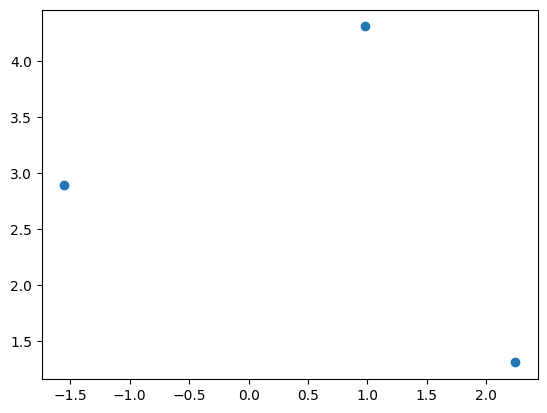

In [21]:
plt.scatter(centers[:,0],centers[:,1])




In [22]:
# now do a prediction.  we have oleskii.  we likes music (x1), he likes sports (x2), likes in chech republic (x3),
# his language is Ukrainian (x3). so he belongs to cluster of (people who like olivia rodriguez)



Kmean.predict(np.array([[-2,2]]))

array([0], dtype=int32)

In [24]:
# computer spam

centers[0]

array([-1.5510878 ,  2.88827923])

In [25]:
# football fans

centers[1]

array([2.2427373 , 1.30652003])

In [6]:
centers

array([[-1.5510878 ,  2.88827923],
       [ 2.2427373 ,  1.30652003],
       [ 0.9801637 ,  4.30837857]])

In [7]:
np.column_stack([X,y,preds])

NameError: name 'preds' is not defined

In [48]:
Kmean.cluster_centers_

array([[-1.5510878 ,  2.88827923],
       [ 2.2427373 ,  1.30652003],
       [ 0.9801637 ,  4.30837857]])

In [31]:
Kmean.cluster_centers_[0]

array([-1.5510878 ,  2.88827923])

In [36]:
c=Kmean.cluster_centers_[2]
c

array([0.9801637 , 4.30837857])

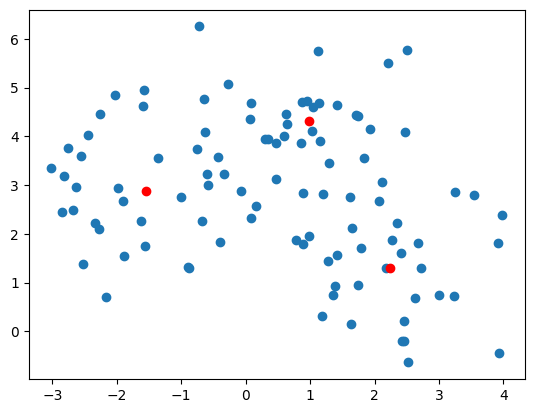

In [47]:
# you can only do x and y
# so we plot x1, x2
# center we plot the centers coordinates

# plt.scatter(x,y)



plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0],centers[:,1],c=['red'])

#plt.scatter(a,b,f, color=['red', 'pink', 'black'])

#plt.scatter(a,b,c=['red', 'pink', 'black'],s=600)
plt.show()

In [51]:
# what does this do:

# procedure with all MLmodels

# 1.  train
# 2.  predict .  it's not really a prediction it's more of a classify.  but they use the word predict.


preds=Kmean.predict(X)

In [52]:
X.shape

(100, 2)

In [53]:
preds.shape

(100,)

**Adjusted Rand Index (ARI)**

This measures the similarity between the true labels and the cluster assignments. It ranges from -1 to 1, with 1 indicating perfect agreement.

when we did linear regression.  we used what metric to calculate whether the data fit the model?    That was R2 score.

R2 score does not fit here.  because thast was for linear regression.





In [56]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(y, preds)

0.7251402595336714

Definition:

The **Adjusted Rand Index (ARI)** is a metric used to evaluate the similarity between two data clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. The ARI adjusts the Rand Index by accounting for chance groupings, providing a value between -1 and 1, where 1 indicates perfect agreement, 0 indicates random labeling, and negative values indicate less than random agreement.

These metrics provide a way to evaluate the clustering performance without needing the cluster labels to match exactly. ARI adjusts for chance clustering, and NMI normalizes the mutual information score to be between 0 and 1.

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y, preds)
nmi = normalized_mutual_info_score(y, preds)

print(f'Adjusted Rand Index: {ari}')
print(f'Normalized Mutual Information: {nmi}')


In [59]:
!ls sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [61]:

#Homework.  Do K-means clustering with this data




import pandas as pd


df=pd.read_csv('sample_data/california_housing_test.csv')


df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [67]:
Z=df.to_numpy()

model = KMeans(n_clusters=7, random_state=42)
model.fit(Z)

print(model.labels_)
print(model.cluster_centers_)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 5 4 ... 0 5 3]
[[-1.19847637e+02  3.66744863e+01  2.84965753e+01  2.02132877e+03
   4.41489726e+02  1.18884589e+03  3.98667808e+02  2.37626507e+00
   8.04506849e+04]
 [-1.20090124e+02  3.56132231e+01  3.09586777e+01  3.10064876e+03
   5.72123967e+02  1.38191322e+03  5.38309917e+02  5.37132603e+00
   3.64767769e+05]
 [-1.19643419e+02  3.53678495e+01  2.85311828e+01  2.83210323e+03
   5.70445161e+02  1.49576344e+03  5.31901075e+02  4.15227312e+00
   2.30202581e+05]
 [-1.19654737e+02  3.51832536e+01  3.28421053e+01  3.14755024e+03
   5.55612440e+02  1.21618660e+03  5.13602871e+02  6.89333684e+00
   4.82218780e+05]
 [-1.19925368e+02  3.55540184e+01  2.86901840e+01  2.94971166e+03
   5.64748466e+02  1.40751840e+03  5.35757669e+02  4.68860153e+00
   2.87496012e+05]
 [-1.19157327e+02  3.50781643e+01  2.85652174e+01  2.47820290e+03
   5.36019324e+02  1.49916908e+03  4.95995169e+02  3.48902625e+00
   1.75037037e+05]
 [-1.19313508e+02  3.56173056e+01  2.74484629e+01  2.51824051e+03
   5.33837

**Elbow Method**

there is a another way to do this which is to just let the algorithm pick the number of clusters itself.

often that is the most logical thing to do.  If we pick 7 that's just a guess.





In [72]:
#-1.19847637e+02

# means 1.1984 * 10**2

# that's scientific notation



In [70]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [71]:
# it's not medium house price, it's not total rooms, it's all of that



model.cluster_centers_[6].shape

(9,)

<Axes: xlabel='longitude', ylabel='latitude'>

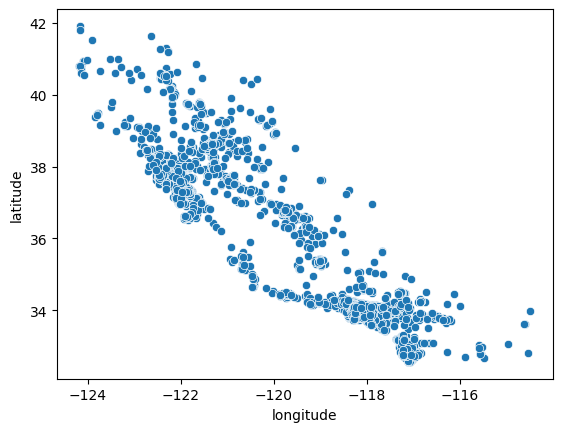

In [62]:
import seaborn as sns

data=df.loc[:,['longitude', 'latitude']]



sns.scatterplot(data, x = 'longitude', y = 'latitude')

#sns.scatterplot(data, x = 'longitude', y = 'latitude', hue = 'median_house_value')